<a href="https://colab.research.google.com/github/hei1sme/MAI391_project/blob/main/MAI391_SE194127_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dự đoán nghỉ việc của nhân viên bằng hồi quy Logistic**


## ***Giới thiệu***

### **Mô tả bài toán**  
Dự án này nhằm xây dựng một mô hình **Hồi quy Logistic** để dự đoán khả năng nghỉ việc của nhân viên dựa trên các đặc điểm nhân khẩu học, tài chính và công việc, bao gồm tuổi tác, mức lương, khoảng cách từ nhà đến nơi làm việc, thâm niên tại công ty, mức độ hài lòng, và các yếu tố khác.  

- **Mục tiêu**: Phát triển một mô hình dự báo chính xác biến mục tiêu `Attrition` (nghỉ việc hoặc không), từ đó hỗ trợ doanh nghiệp trong việc đưa ra các chiến lược giữ chân nhân sự hiệu quả.  
- **Dữ liệu sử dụng**: Tập dữ liệu HR Analytics Prediction từ Kaggle, bao gồm thông tin chi tiết về nhân viên và trạng thái nghỉ việc.  
- **Phương pháp tiếp cận**: Áp dụng **Hồi quy Logistic** – một thuật toán phân loại nhị phân phổ biến và phù hợp với bài toán này.  

### **Lý do lựa chọn Hồi quy Logistic**  
- **Tính đơn giản và hiệu quả**: Hồi quy Logistic là một trong những mô hình phân loại nhị phân tiêu chuẩn, dễ triển khai và có hiệu suất tốt với các tập dữ liệu vừa và nhỏ.  
- **Dễ dàng diễn giải kết quả**: Các hệ số của mô hình có thể được sử dụng để đánh giá tác động của từng biến độc lập lên xác suất nghỉ việc của nhân viên.  
- **Khả năng tổng quát hóa tốt**: Hồi quy Logistic có thể hoạt động hiệu quả ngay cả khi tập dữ liệu không quá lớn, giúp tránh tình trạng overfitting so với các mô hình phức tạp hơn.  
- **Ứng dụng thực tế trong lĩnh vực nhân sự**: Mô hình này đã được sử dụng rộng rãi trong phân tích dữ liệu nhân sự để dự đoán xu hướng nghỉ việc và đề xuất các biện pháp can thiệp kịp thời.  

Mô hình này sẽ được đánh giá dựa trên các thước đo phổ biến như **Accuracy, Precision, Recall, F1-score**, và sẽ được trực quan hóa thông qua **Confusion Matrix, đường ROC và AUC** để đảm bảo hiệu suất và tính chính xác.

## ***Nhập Thư Viện***

In [611]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)

sns.set(style="whitegrid")

## ***Nhập Dataset***

In [569]:
# Đọc dữ liệu từ dataset đã upload lên github
url = "https://raw.githubusercontent.com/hei1sme/MAI391_project/refs/heads/main/data/HR-Employee-Attrition.csv"
df = pd.read_csv(url)

# Kiểm tra số dòng và số cột
print(f"Dataset có {df.shape[0]} dòng và {df.shape[1]} cột")

# Xem 5 dòng đầu tiên
df.head()

Dataset có 1470 dòng và 35 cột


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## ***Khám Phá Dữ Liệu - Sơ Bộ***

### Kiểm Tra Thông Tin Dữ Liệu

In [570]:
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (1470, 35)


In [571]:
print("\n Thông tin dữ liệu:")
df.info()


 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [572]:
print("\n Số lượng giá trị thiếu trong từng cột:")
df.isnull().sum()


 Số lượng giá trị thiếu trong từng cột:


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [573]:
print("\nThống kê mô tả cho các biến số:")
df.describe()


Thống kê mô tả cho các biến số:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Kiểm tra phân phối dữ liệu

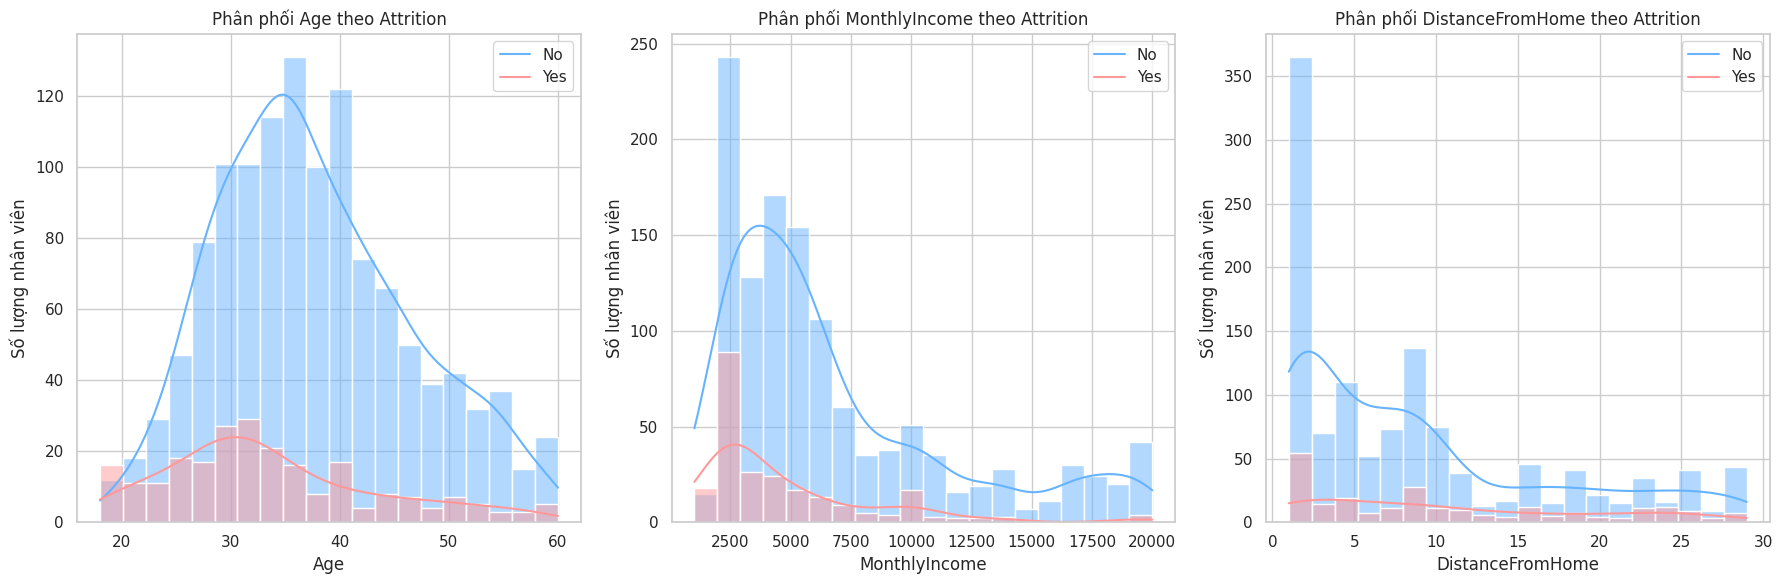

In [574]:
# Danh sách các biến quan trọng
important_features = ["Age", "MonthlyIncome", "DistanceFromHome"]

# Tạo figure cho các biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(important_features):
    sns.histplot(data=df, x=feature, hue="Attrition", kde=True, bins=20, palette=["#ff9999", "#66b3ff"], ax=axes[i])
    axes[i].set_title(f"Phân phối {feature} theo Attrition")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Số lượng nhân viên")
    axes[i].legend(["No", "Yes"])

# Hiển thị tất cả biểu đồ trên cùng một hàng
plt.tight_layout()
plt.show()

In [575]:
print("\nPhân bố của biến mục tiêu (Attrition):")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"Tỷ lệ nhân viên nghỉ việc: {attrition_counts['Yes'] / len(df) * 100:.2f}%")


Phân bố của biến mục tiêu (Attrition):
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Tỷ lệ nhân viên nghỉ việc: 16.12%


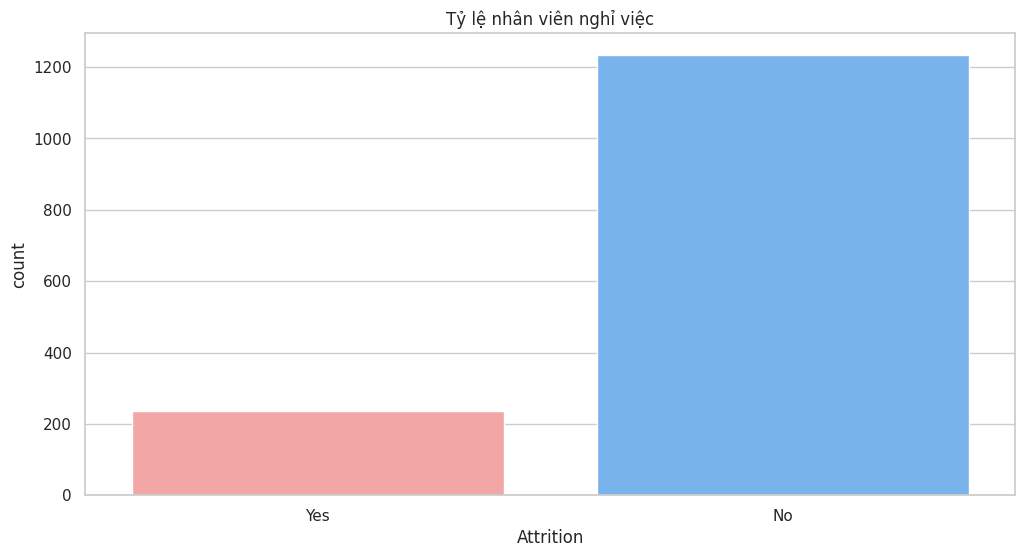

In [576]:
# Kiểm tra phân bố của biến mục tiêu
plt.figure(figsize=(12, 6))
sns.countplot(x="Attrition", data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Tỷ lệ nhân viên nghỉ việc")
plt.show()

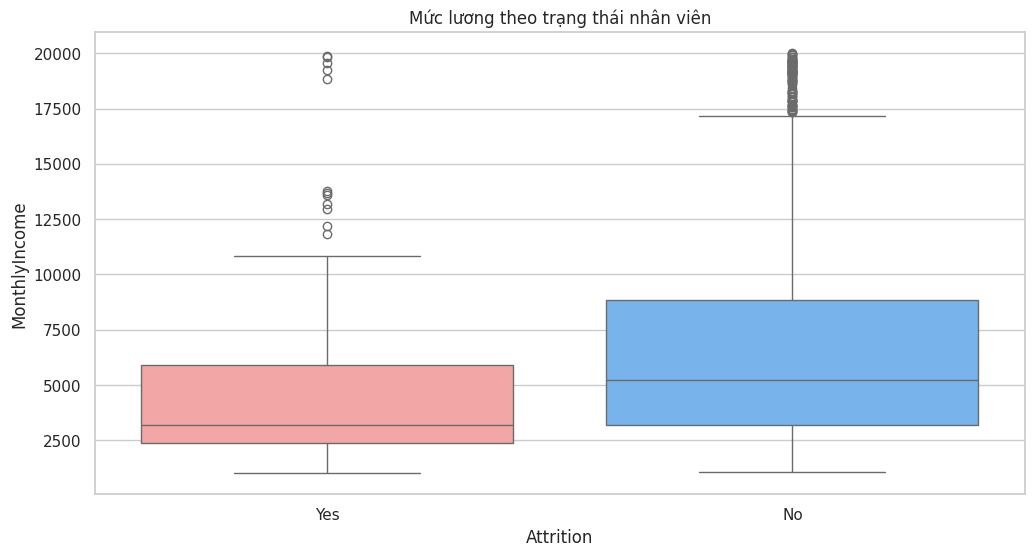

In [577]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ hộp cho mức lương theo trạng thái nhân viên
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"], data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Mức lương theo trạng thái nhân viên")
plt.show()

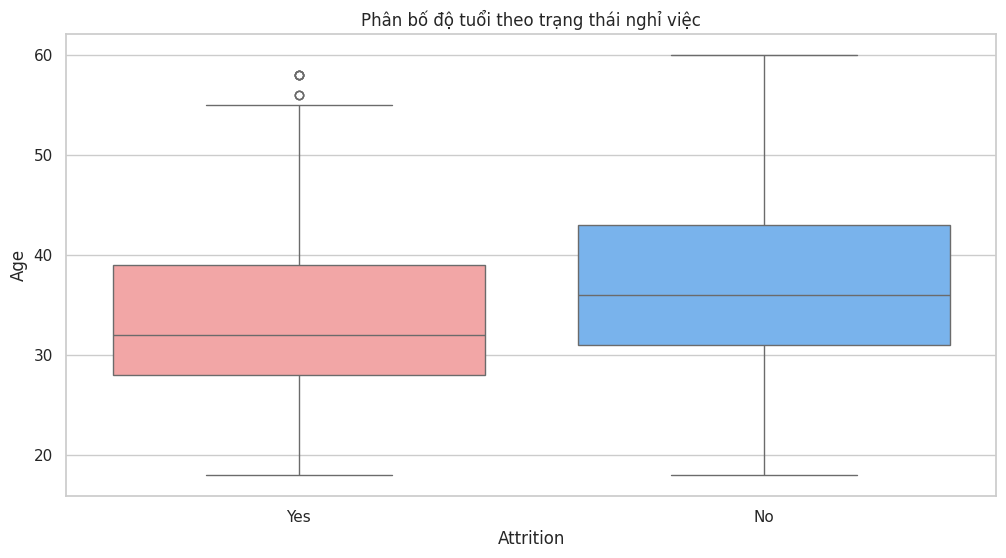

In [578]:
# Phân tích phân bố độ tuổi theo Attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=df, palette=["#ff9999", "#66b3ff"])
plt.title('Phân bố độ tuổi theo trạng thái nghỉ việc')
plt.show()

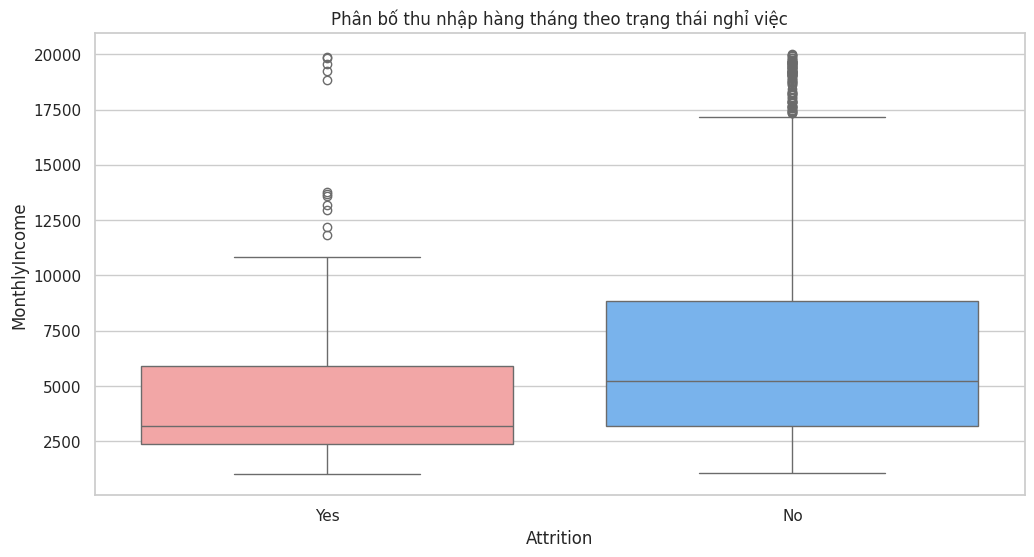

In [579]:
# Phân tích thu nhập hàng tháng theo Attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=["#ff9999", "#66b3ff"])
plt.title('Phân bố thu nhập hàng tháng theo trạng thái nghỉ việc')
plt.show()

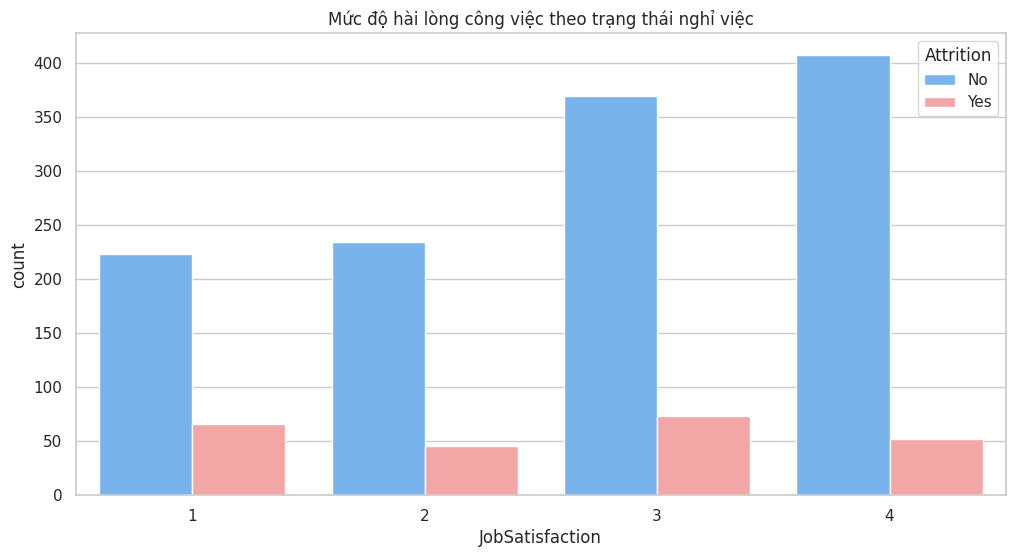

In [580]:
# Phân tích mức độ hài lòng công việc
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette=["#66b3ff", "#ff9999"])
plt.title('Mức độ hài lòng công việc theo trạng thái nghỉ việc')
plt.show()

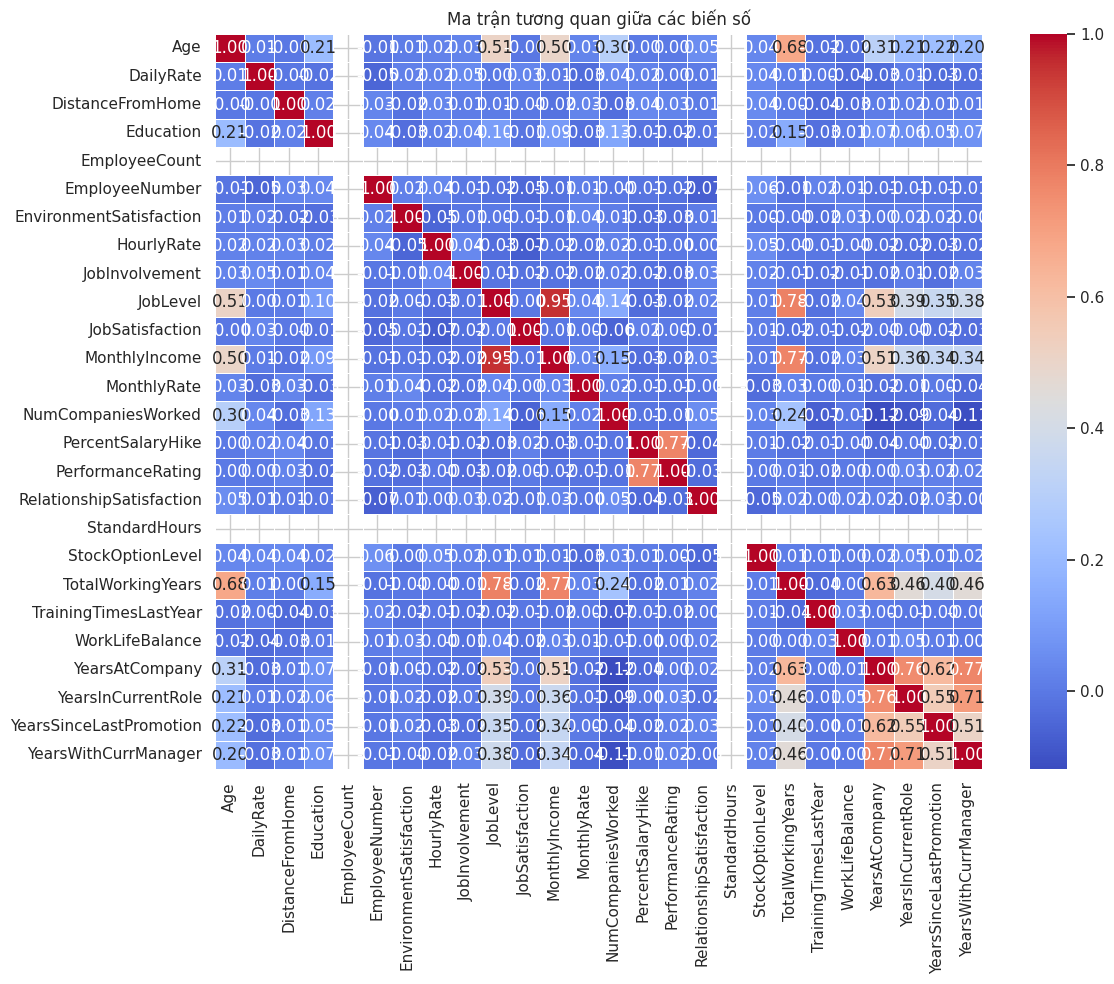

In [581]:
# Chỉ lấy các biến số (numeric)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Tính toán ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số')
plt.tight_layout()
plt.show()

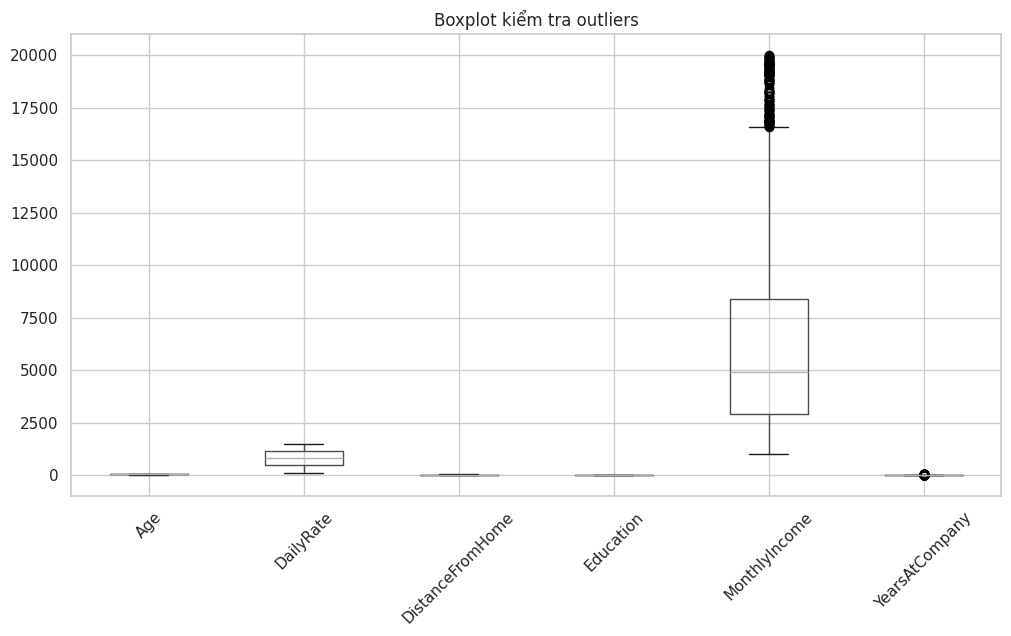

Số lượng outliers theo IQR:
Age                   0
DailyRate             0
DistanceFromHome      0
Education             0
MonthlyIncome       114
YearsAtCompany      104
dtype: int64

Số lượng outliers theo Z-score:
Age                  0
DailyRate            0
DistanceFromHome     0
Education            0
MonthlyIncome        0
YearsAtCompany      25
dtype: int64


In [582]:
# Chọn các cột số
numerical_columns = ["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome", "YearsAtCompany"]

# Vẽ boxplot để kiểm tra outliers
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot(rot=45)
plt.title("Boxplot kiểm tra outliers")
plt.show()

# Kiểm tra outliers bằng IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

print("Số lượng outliers theo IQR:")
print(outliers_iqr)

# Kiểm tra outliers bằng Z-score
z_scores = np.abs(zscore(df[numerical_columns]))
outliers_zscore = (z_scores > 3).sum(axis=0)

print("\nSố lượng outliers theo Z-score:")
print(outliers_zscore)


## ***Tiền Xử Lý Dữ Liệu***

### Loại bỏ cột không cần thiết

In [583]:
# Danh sách các cột không cần thiết
columns_to_drop = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]

# Xóa cột
df.drop(columns=columns_to_drop, inplace=True)

# Kiểm tra lại kích thước dataset sau khi loại bỏ cột
print(f"Kích thước mới của dataset: {df.shape}")

Kích thước mới của dataset: (1470, 31)


### Mã hóa dữ liệu

In [584]:
# Mã hóa biến mục tiêu
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Xác định danh sách các cột phân loại
categorical_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

# Áp dụng One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Kiểm tra dữ liệu sau khi mã hóa
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


### Loại bỏ Outliners

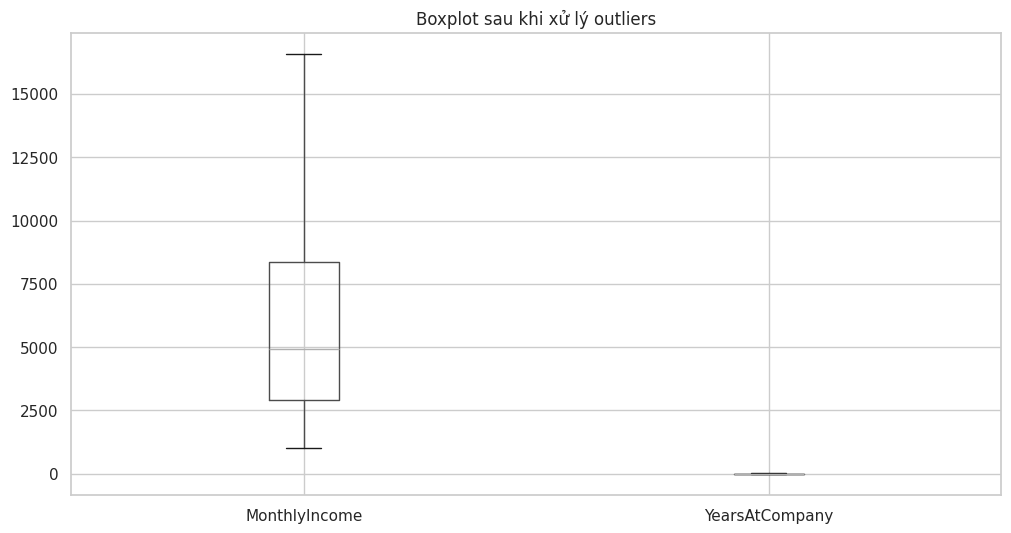

In [585]:
def clip_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(data[column], None, upper_bound)  # Giới hạn giá trị lớn nhất

# Áp dụng cho MonthlyIncome & YearsAtCompany
df["MonthlyIncome"] = clip_outliers(df, "MonthlyIncome")
df["YearsAtCompany"] = clip_outliers(df, "YearsAtCompany")

# Kiểm tra lại boxplot sau khi xử lý outliers
plt.figure(figsize=(12, 6))
df[["MonthlyIncome", "YearsAtCompany"]].boxplot()
plt.title("Boxplot sau khi xử lý outliers")
plt.show()

### Chuẩn hóa dữ liệu

In [586]:
# Danh sách các cột số
numerical_columns = ["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome", "YearsAtCompany"]

# Khởi tạo bộ chuẩn hóa MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Kiểm tra lại dữ liệu sau khi chuẩn hóa
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,2,94,3,2,4,0.320062,19479,8,11,3,1,0,8,0,1,0.333333,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,0.738095,0,0.126700,0.250000,0.00,3,61,2,2,2,0.264642,24907,1,23,4,4,1,10,3,3,0.555556,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,0.452381,1,0.909807,0.035714,0.25,4,92,2,1,3,0.069419,2396,6,15,3,2,0,7,3,3,0.000000,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,0.357143,0,0.923407,0.071429,0.75,4,56,3,1,3,0.122014,23159,1,11,3,3,0,8,3,3,0.444444,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,0.214286,0,0.350036,0.035714,0.00,1,40,3,1,2,0.157912,16632,9,12,3,4,1,6,3,3,0.111111,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


### Chia tập dữ liệu

In [587]:
# Chia tập train/test (80% - 20%)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Xử lý imbalance

In [588]:
#Áp dụng SMOTE trên tập huấn luyện
print("Trước khi SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Sau khi SMOTE:", Counter(y_train_resampled))

Trước khi SMOTE: Counter({0: 986, 1: 190})
Sau khi SMOTE: Counter({0: 986, 1: 986})


In [589]:
# Lưu dataset đã xử lý
processed_file_path = "/content/data/HR-Employee-Attrition-Processed.csv"
df.to_csv(processed_file_path, index=False)
print(f"Dữ liệu sau xử lý đã được lưu tại: {processed_file_path}")

# Kiểm tra kích thước tập dữ liệu
print("Kích thước tập huấn luyện:", X_train_resampled.shape, y_train_resampled.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)

Dữ liệu sau xử lý đã được lưu tại: /content/data/HR-Employee-Attrition-Processed.csv
Kích thước tập huấn luyện: (1972, 44) (1972,)
Kích thước tập kiểm tra: (294, 44) (294,)


## ***Khám Phá Dữ Liệu - Sau Tiền Xử Lý***

In [590]:
df_processed = pd.read_csv("/content/data/HR-Employee-Attrition-Processed.csv")
df_processed.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,2,94,3,2,4,0.320062,19479,8,11,3,1,0,8,0,1,0.333333,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,0.738095,0,0.126700,0.250000,0.00,3,61,2,2,2,0.264642,24907,1,23,4,4,1,10,3,3,0.555556,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,0.452381,1,0.909807,0.035714,0.25,4,92,2,1,3,0.069419,2396,6,15,3,2,0,7,3,3,0.000000,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,0.357143,0,0.923407,0.071429,0.75,4,56,3,1,3,0.122014,23159,1,11,3,3,0,8,3,3,0.444444,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,0.214286,0,0.350036,0.035714,0.00,1,40,3,1,2,0.157912,16632,9,12,3,4,1,6,3,3,0.111111,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [591]:
df_processed.shape

(1470, 45)

In [592]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   float64
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   HourlyRate                         1470 non-null   int64  
 7   JobInvolvement                     1470 non-null   int64  
 8   JobLevel                           1470 non-null   int64  
 9   JobSatisfaction                    1470 non-null   int64  
 10  MonthlyIncome                      1470 non-null   float64
 11  MonthlyRate                        1470 non-null   int64

In [593]:
df_processed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.501421,0.292590,0.478231,2.721769,65.891156,2.729932,2.063946,2.728571,0.343751,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,0.367649,4.229252,2.187755,4.123129
std,0.217509,0.367863,0.288840,0.289531,0.256041,1.093082,20.329428,0.711561,1.106940,1.102846,0.279562,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,0.277210,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.259843,0.035714,0.250000,2.000000,48.000000,2.000000,1.000000,2.000000,0.122142,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,0.166667,2.000000,0.000000,2.000000
50%,0.428571,0.000000,0.501074,0.214286,0.500000,3.000000,66.000000,3.000000,2.000000,3.000000,0.251092,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,0.277778,3.000000,1.000000,3.000000
75%,0.595238,0.000000,0.755190,0.464286,0.750000,4.000000,83.750000,3.000000,3.000000,4.000000,0.473285,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,0.500000,7.000000,3.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,100.000000,4.000000,5.000000,4.000000,1.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,1.000000,18.000000,15.000000,17.000000


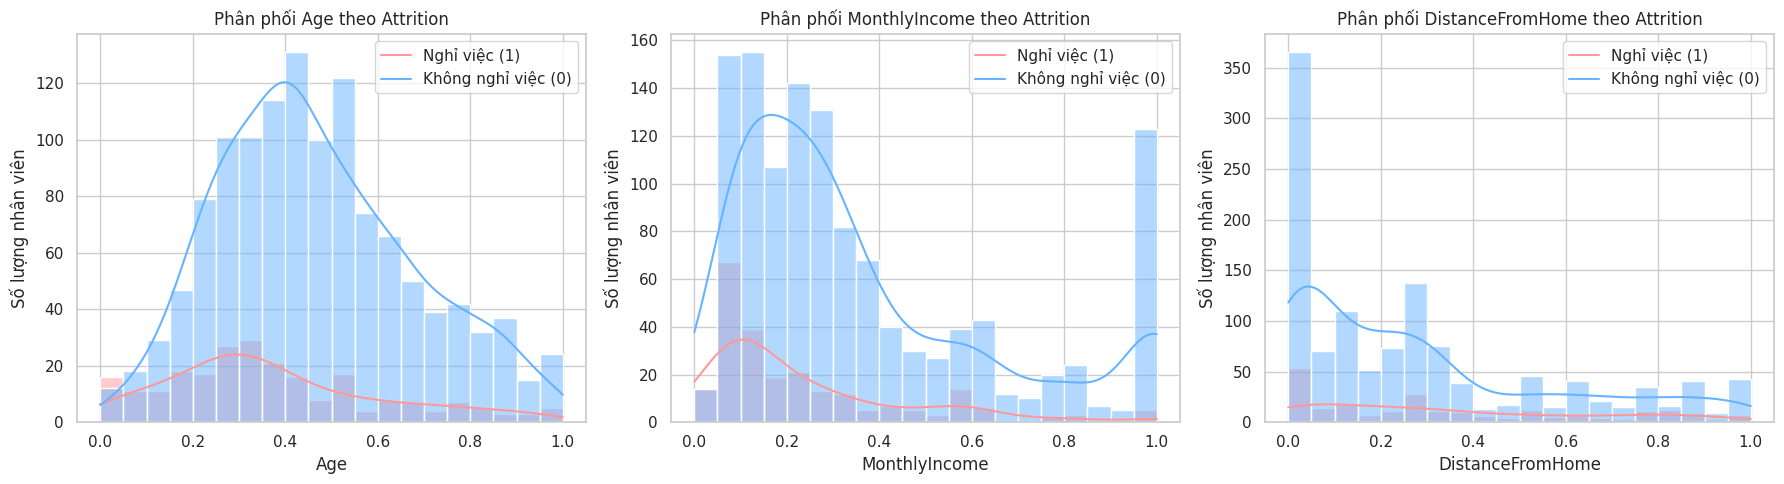

In [594]:
# Danh sách các biến quan trọng
important_features = ["Age", "MonthlyIncome", "DistanceFromHome"]

# Tạo figure cho các biểu đồ phân phối
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(important_features):
    sns.histplot(data=df_processed, x=feature, hue="Attrition", kde=True, bins=20, palette=["#66b3ff", "#ff9999"], ax=axes[i])
    axes[i].set_title(f"Phân phối {feature} theo Attrition")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Số lượng nhân viên")
    axes[i].legend(["Nghỉ việc (1)", "Không nghỉ việc (0)"])

# Hiển thị tất cả biểu đồ trên cùng một hàng
plt.tight_layout()
plt.show()

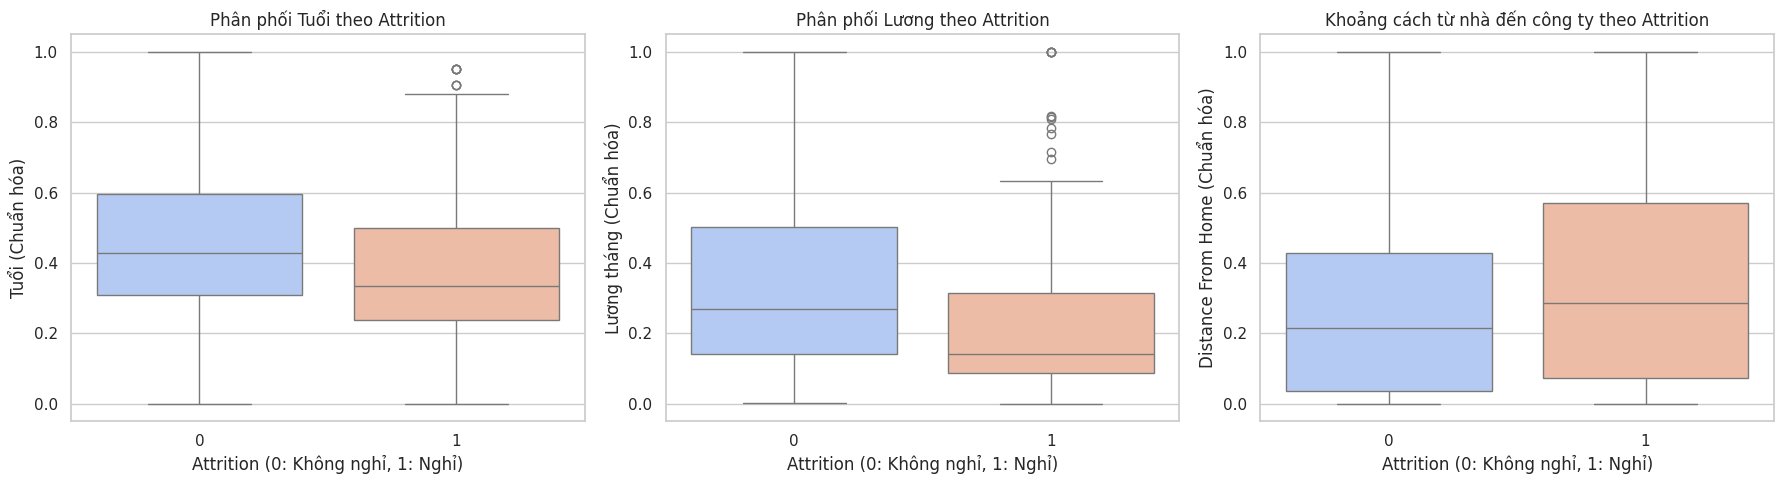

In [595]:
# Vẽ biểu đồ so sánh Attrition với Age, MonthlyIncome, và DistanceFromHome
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tuổi & Attrition
sns.boxplot(x=df_processed["Attrition"], y=df_processed["Age"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Phân phối Tuổi theo Attrition")
axes[0].set_xlabel("Attrition (0: Không nghỉ, 1: Nghỉ)")
axes[0].set_ylabel("Tuổi (Chuẩn hóa)")

# Lương & Attrition
sns.boxplot(x=df_processed["Attrition"], y=df_processed["MonthlyIncome"], palette="coolwarm", ax=axes[1])
axes[1].set_title("Phân phối Lương theo Attrition")
axes[1].set_xlabel("Attrition (0: Không nghỉ, 1: Nghỉ)")
axes[1].set_ylabel("Lương tháng (Chuẩn hóa)")

# Khoảng cách từ nhà đến công ty & Attrition
sns.boxplot(x=df_processed["Attrition"], y=df_processed["DistanceFromHome"], palette="coolwarm", ax=axes[2])
axes[2].set_title("Khoảng cách từ nhà đến công ty theo Attrition")
axes[2].set_xlabel("Attrition (0: Không nghỉ, 1: Nghỉ)")
axes[2].set_ylabel("Distance From Home (Chuẩn hóa)")

plt.tight_layout()
plt.show()

## ***Huấn luyện mô hình Logistic Regression***

### Huấn luyện mô hình bằng sklearn

In [596]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
model_sklearn = LogisticRegression(max_iter=1000, random_state=42)
model_sklearn.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_proba_sklearn = model_sklearn.predict_proba(X_test)[:, 1]  # Xác suất thuộc class 1

# Đánh giá mô hình
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("\n--- Đánh giá Mô Hình ---")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1-Score: {f1_sklearn:.4f}")


--- Đánh giá Mô Hình ---
Accuracy: 0.8776
Precision: 0.6341
Recall: 0.5532
F1-Score: 0.5909


#### Confusion Matrix

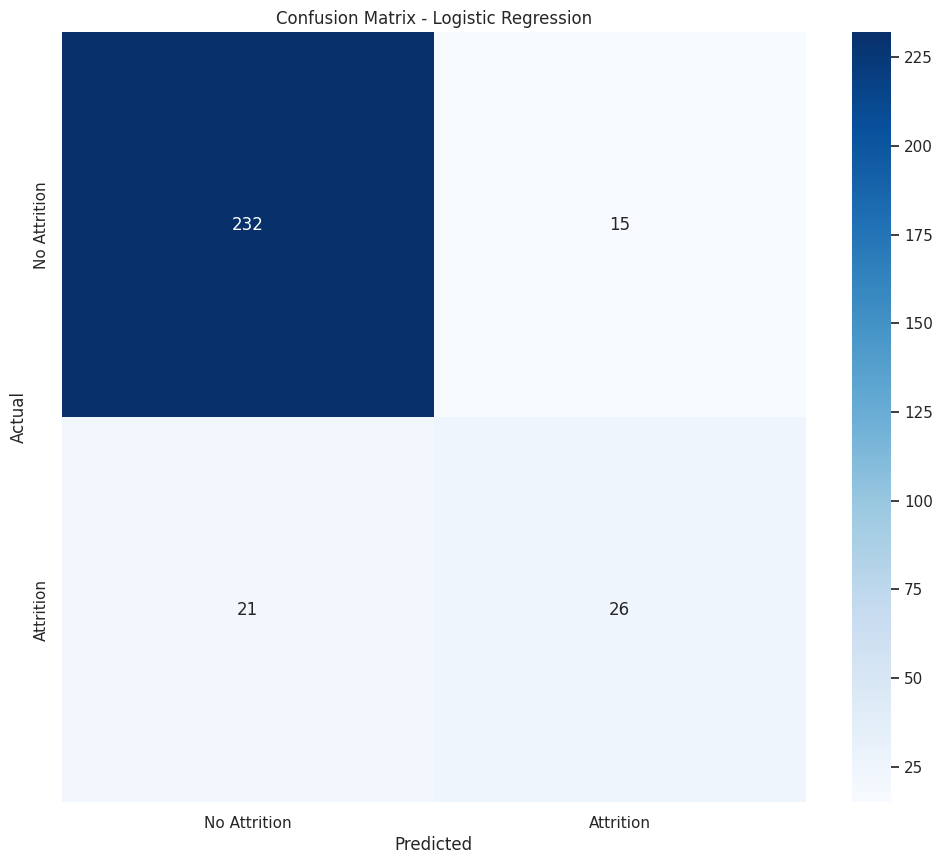

In [597]:
# Confusion Matrix
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_sklearn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attrition", "Attrition"],
            yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#### ROC Curve

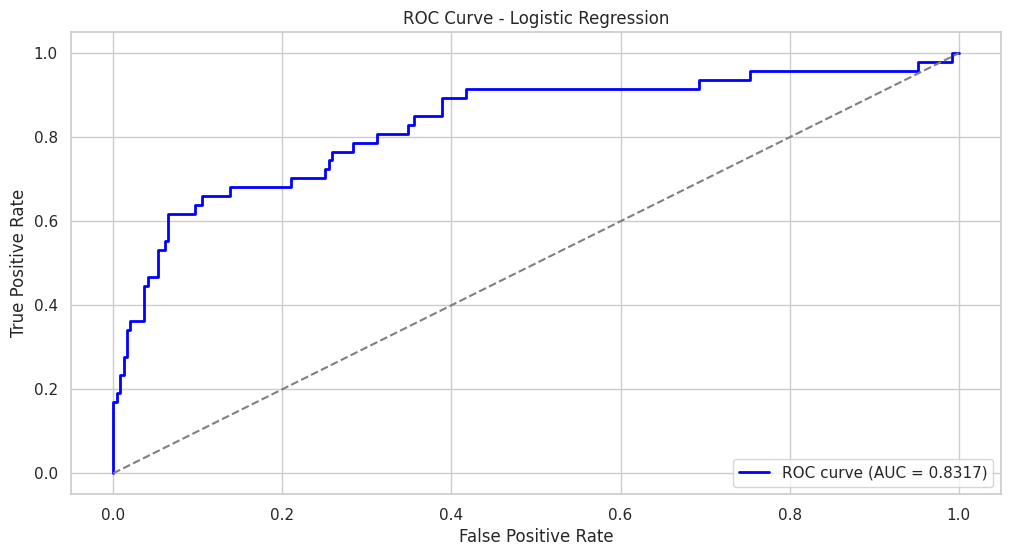

In [598]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_sklearn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve

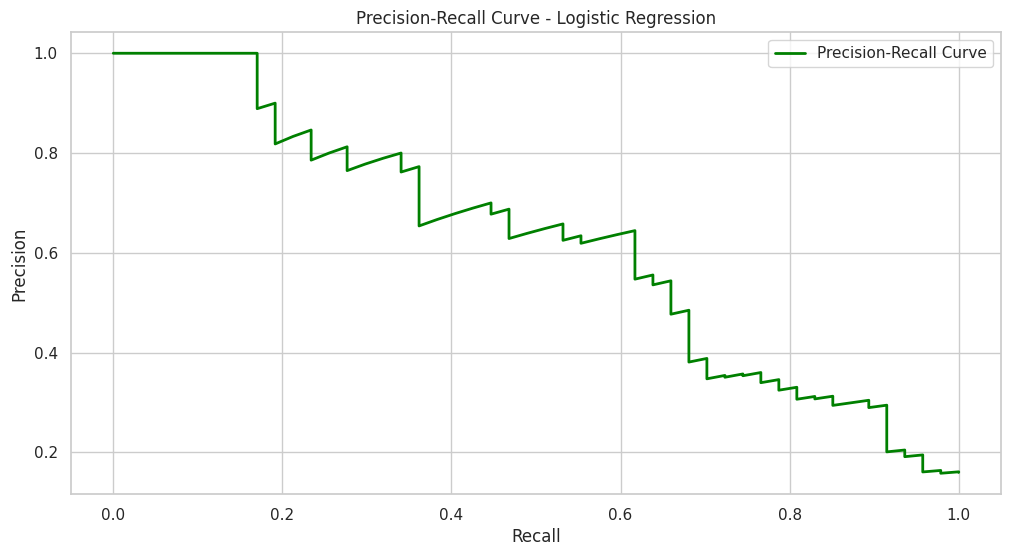

In [599]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_sklearn)

plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.show()

#### Thực tế và dự đoán

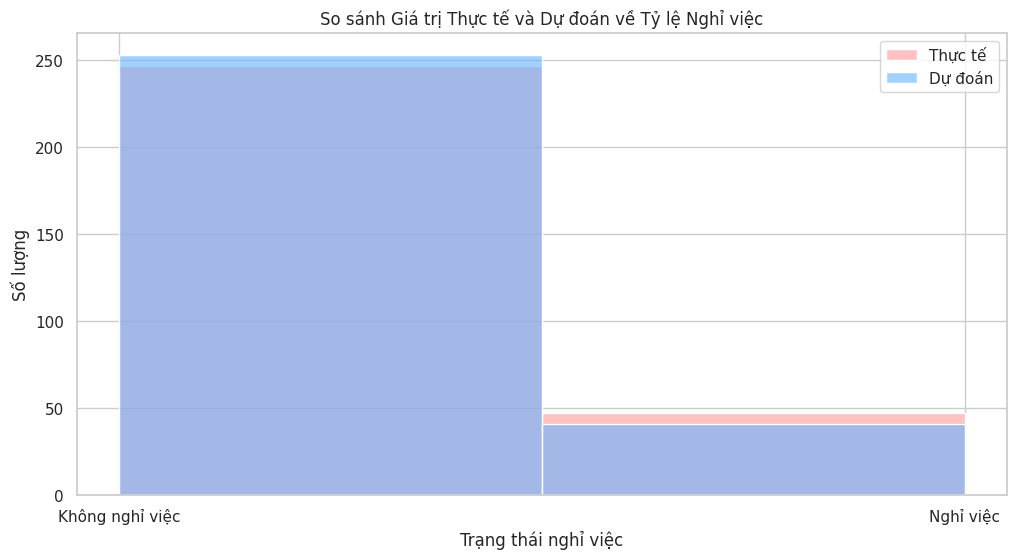

In [600]:
# Định nghĩa bảng màu tùy chỉnh
colors = {"Thực tế": "#ff9999", "Dự đoán": "#66b3ff"}

plt.figure(figsize=(12, 6))

# Sử dụng bảng màu tùy chỉnh cho biểu đồ
sns.histplot(y_test, bins=2, label="Thực tế", color=colors["Thực tế"], alpha=0.6, kde=False)
sns.histplot(y_pred_sklearn, bins=2, label="Dự đoán", color=colors["Dự đoán"], alpha=0.6, kde=False)

# Thêm nhãn, tiêu đề, và chú giải
plt.xlabel("Trạng thái nghỉ việc")
plt.ylabel("Số lượng")
plt.xticks([0, 1], ["Không nghỉ việc", "Nghỉ việc"])
plt.title("So sánh Giá trị Thực tế và Dự đoán về Tỷ lệ Nghỉ việc")
plt.legend()
plt.show()


### Huấn luyện mô hình thủ công



#### **Giải thích Công thức trong Logistic Regression**

##### **1. Hàm Sigmoid**
Hàm sigmoid là hàm kích hoạt được sử dụng trong Logistic Regression để chuyển đổi đầu ra thành một giá trị xác suất trong khoảng \( (0,1) \):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Trong đó:
- \( z = \theta^T X \) là tích vô hướng giữa vector trọng số \( \theta \) và vector đặc trưng \( X \).
- \( e \) là hằng số Euler.

Hàm sigmoid đảm bảo đầu ra của mô hình luôn nằm trong khoảng [0,1], giúp biểu diễn xác suất xảy ra của một sự kiện.

---

##### **2. Hàm Mất Mát (Log Loss)**
Hàm mất mát thường được sử dụng là **Binary Cross-Entropy Loss**, còn gọi là Log Loss:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Trong đó:
- \( y^{(i)} \): Giá trị thực tế của mẫu thứ \( i \) (0 hoặc 1).
- \( \hat{y}^{(i)} = \sigma(\theta^T X) \): Giá trị dự đoán từ mô hình.
- \( m \): Số lượng mẫu.

---

##### **3. Gradient Descent (Thuật toán tối ưu)**
Gradient Descent được sử dụng để tìm giá trị tối ưu của các trọng số \( \theta \):

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

Trong đó:
- \( \alpha \): Tốc độ học (learning rate).
- \( \hat{y}^{(i)} - y^{(i)} \): Sai số giữa dự đoán và giá trị thực tế.
- \( x_j^{(i)} \): Giá trị của đặc trưng \( j \) của mẫu \( i \).

---

##### **4. Regularization (Chuẩn hóa)**
Regularization giúp giảm overfitting bằng cách thêm vào hàm mất mát một thuật ngữ phạt:

###### **L2 Regularization (Ridge Regression)**
$$
J(\theta) = J_{LogLoss} + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

###### **L1 Regularization (Lasso Regression)**
$$
J(\theta) = J_{LogLoss} + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|
$$

Trong đó:
- \( \lambda \): Hệ số điều chỉnh mức độ regularization.
- **L2** giảm độ lớn của các trọng số (làm mượt mô hình).
- **L1** loại bỏ các trọng số nhỏ (chọn lọc đặc trưng tốt hơn).

---

#### **5. Xác suất và Ngưỡng Phân Loại**
Logistic Regression sử dụng hàm sigmoid để dự đoán xác suất và áp dụng ngưỡng phân loại \( t \) để xác định nhãn:

$$
\hat{y} =
\begin{cases}
1, & \text{nếu } \sigma(\theta^T X) \geq t \\
0, & \text{nếu } \sigma(\theta^T X) < t
\end{cases}
$$

In [601]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 🏋️‍♂️ Hàm huấn luyện Logistic Regression với L2 Regularization
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000, lambda_reg=0.01):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]  # Thêm bias (cột 1) vào X
    theta = np.zeros(n + 1)  # Khởi tạo trọng số bằng 0
    y = y.ravel()  # Chuyển y về dạng (m,)

    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = (np.dot(X.T, (h - y)) / m) + (lambda_reg / m) * theta  # Thêm L2 Regularization
        theta -= learning_rate * gradient  # Cập nhật trọng số

        # Tính Loss có Regularization
        loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + (lambda_reg / (2 * m)) * np.sum(theta**2)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return theta

# Hàm dự đoán
def predict(X, theta, threshold=0.5):
    X = np.c_[np.ones((X.shape[0], 1)), X]  # Thêm bias
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= threshold).astype(int), probabilities

# Chuyển dữ liệu về dạng numpy
X_train_np = X_train_resampled.to_numpy()
y_train_np = y_train_resampled.to_numpy().reshape(-1, 1)  # Đảm bảo y có đúng shape

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().reshape(-1, 1)

# Chuẩn hóa dữ liệu để so sánh công bằng
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

# Huấn luyện mô hình
theta = train_logistic_regression(X_train_np, y_train_np, learning_rate=0.01, epochs=1000, lambda_reg=0.01)

# Dự đoán trên tập kiểm tra
y_pred_manual, y_pred_proba_manual = predict(X_test_np, theta)

# Đánh giá mô hình
accuracy_manual = np.mean(y_pred_manual == y_test_np.ravel())
precision_manual = np.sum((y_pred_manual == 1) & (y_test_np.ravel() == 1)) / np.sum(y_pred_manual == 1)
recall_manual = np.sum((y_pred_manual == 1) & (y_test_np.ravel() == 1)) / np.sum(y_test_np.ravel() == 1)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

print("\n--- Đánh giá Mô Hình (Không dùng thư viện, có Regularization) ---")
print(f"Accuracy: {accuracy_manual:.4f}")
print(f"Precision: {precision_manual:.4f}")
print(f"Recall: {recall_manual:.4f}")
print(f"F1-Score: {f1_manual:.4f}")

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4326
Epoch 200, Loss: 0.3564
Epoch 300, Loss: 0.3185
Epoch 400, Loss: 0.2956
Epoch 500, Loss: 0.2802
Epoch 600, Loss: 0.2691
Epoch 700, Loss: 0.2607
Epoch 800, Loss: 0.2541
Epoch 900, Loss: 0.2488

--- Đánh giá Mô Hình (Không dùng thư viện, có Regularization) ---
Accuracy: 0.8469
Precision: 0.5278
Recall: 0.4043
F1-Score: 0.4578


#### Confusion Matrix

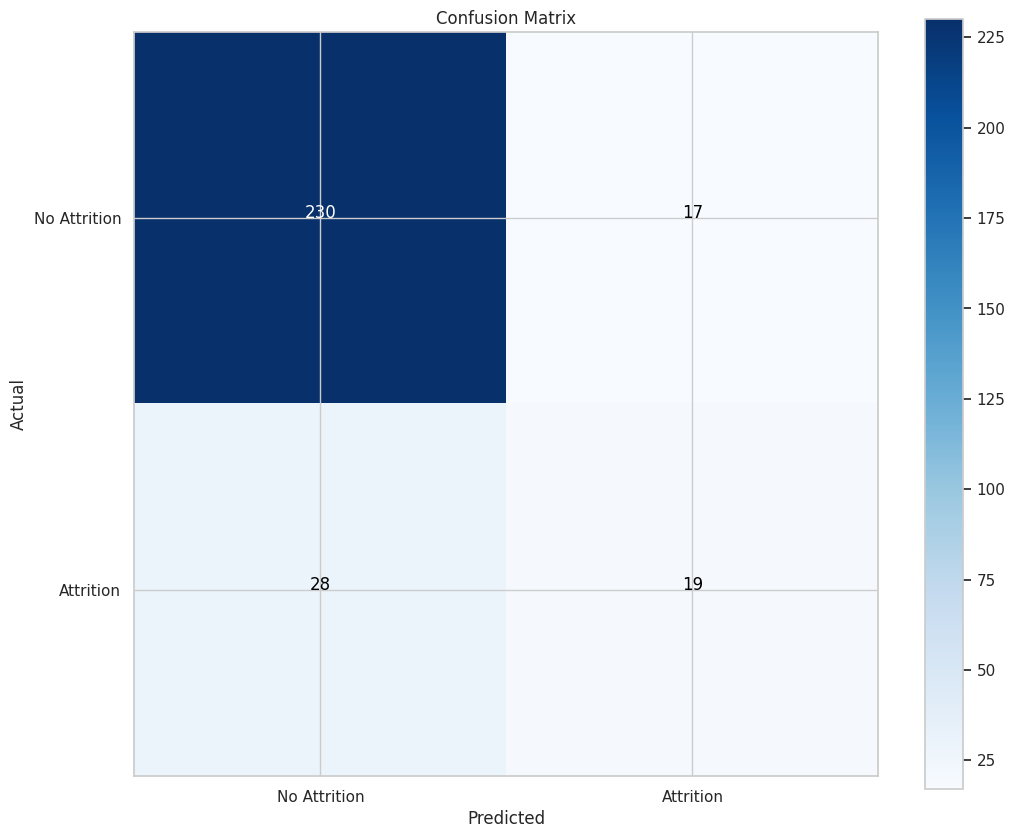

In [602]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = ["No Attrition", "Attrition"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

plot_confusion_matrix(y_test_np, y_pred_manual)


#### ROC Curve

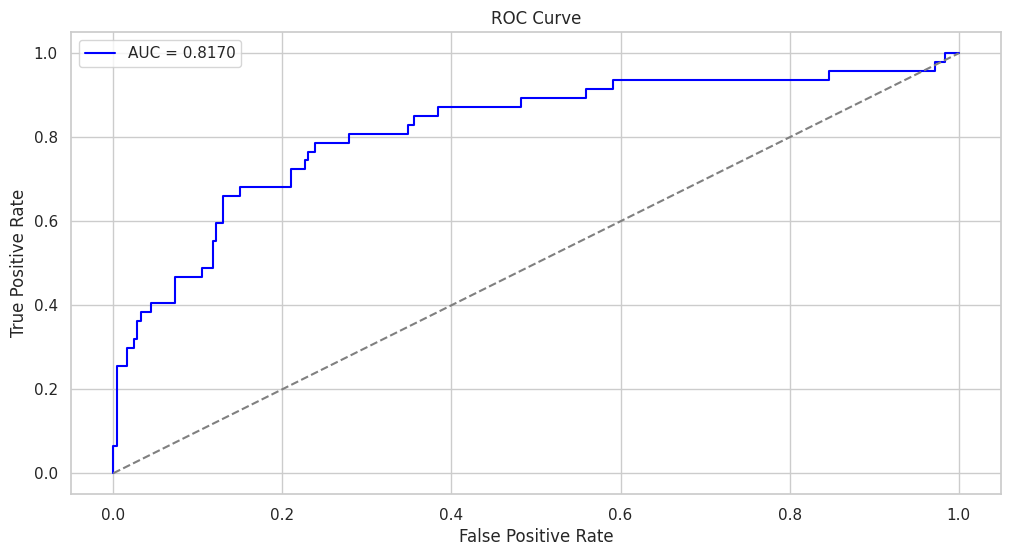

In [603]:
# ROC Curve
def plot_roc_curve(y_true, y_proba, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Random baseline
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

plot_roc_curve(y_test_np, y_pred_proba_manual)


#### Precision-Recall Curve

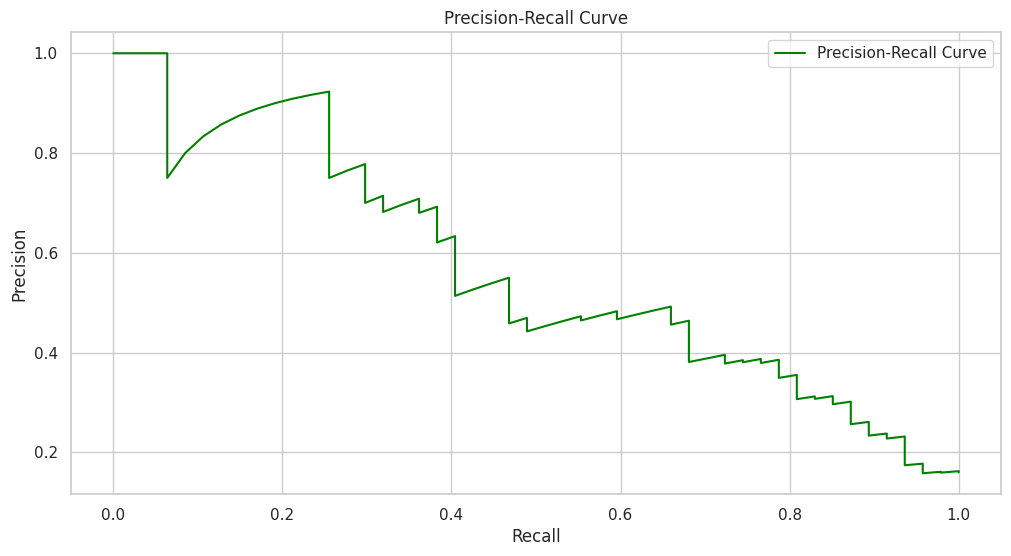

In [604]:
# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_proba, title="Precision-Recall Curve"):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)

    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, color="green", label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.show()

plot_precision_recall_curve(y_test_np, y_pred_proba_manual)


#### Thục tế và Dự đoán

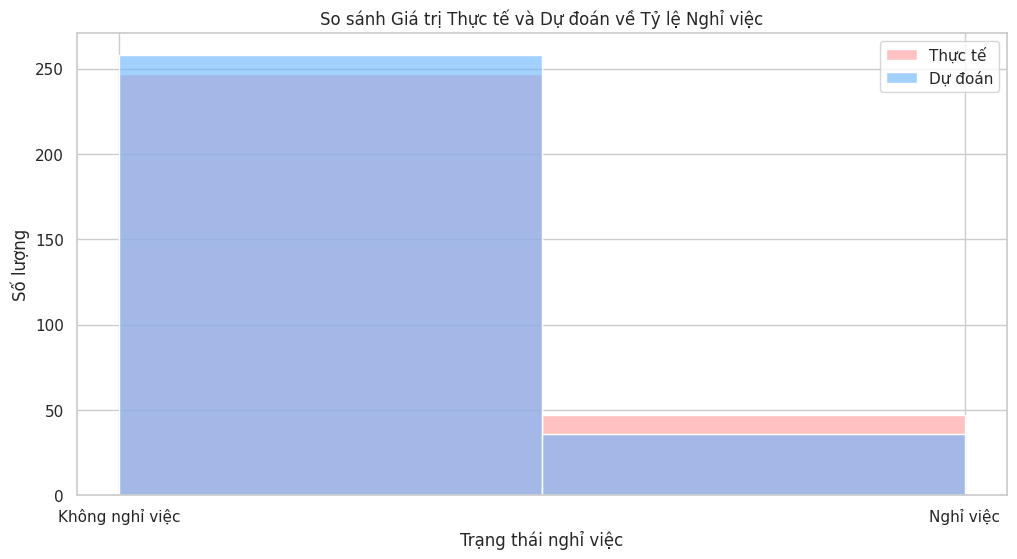

In [605]:
# Actual vs Predicted Distribution
colors = {"Thực tế": "#ff9999", "Dự đoán": "#66b3ff"}

plt.figure(figsize=(12, 6))

# Using custom colors
sns.histplot(y_test_np.ravel(), bins=2, label="Thực tế", color=colors["Thực tế"], alpha=0.6, kde=False)
sns.histplot(y_pred_manual, bins=2, label="Dự đoán", color=colors["Dự đoán"], alpha=0.6, kde=False)

plt.xlabel("Trạng thái nghỉ việc")
plt.ylabel("Số lượng")
plt.xticks([0, 1], ["Không nghỉ việc", "Nghỉ việc"])
plt.title("So sánh Giá trị Thực tế và Dự đoán về Tỷ lệ Nghỉ việc")
plt.legend()
plt.show()


### So sánh giữa sklearn và thủ công

--- So sánh chỉ số đánh giá ---
Accuracy (sklearn): 0.8776, Accuracy (thủ công): 0.8469
Precision (sklearn): 0.6341, Precision (thủ công): 0.5278
Recall (sklearn): 0.5532, Recall (thủ công): 0.4043
F1-Score (sklearn): 0.5909, F1-Score (thủ công): 0.4578


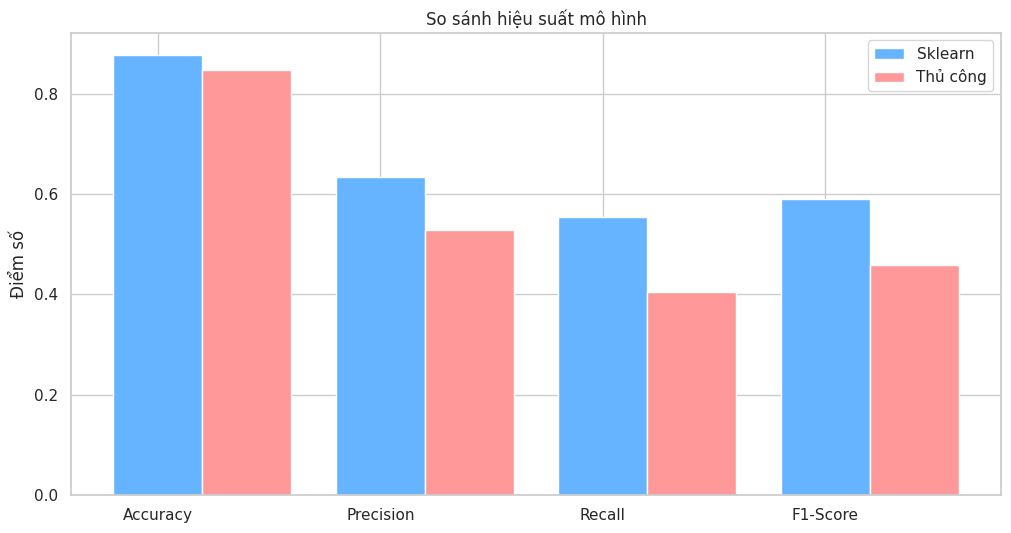

In [606]:
print("--- So sánh chỉ số đánh giá ---")
print(f"Accuracy (sklearn): {accuracy_sklearn:.4f}, Accuracy (thủ công): {accuracy_manual:.4f}")
print(f"Precision (sklearn): {precision_sklearn:.4f}, Precision (thủ công): {precision_manual:.4f}")
print(f"Recall (sklearn): {recall_sklearn:.4f}, Recall (thủ công): {recall_manual:.4f}")
print(f"F1-Score (sklearn): {f1_sklearn:.4f}, F1-Score (thủ công): {f1_manual:.4f}")

# Bar chart for metric comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
sklearn_scores = [accuracy_sklearn, precision_sklearn, recall_sklearn, f1_sklearn]
manual_scores = [accuracy_manual, precision_manual, recall_manual, f1_manual]

x = range(len(metrics))
plt.figure(figsize=(12, 6))
plt.bar(x, sklearn_scores, width=0.4, label="Sklearn", color="#66b3ff", align='center')
plt.bar([i + 0.4 for i in x], manual_scores, width=0.4, label="Thủ công", color="#ff9999", align='center')
plt.xticks(x, metrics)
plt.ylabel("Điểm số")
plt.title("So sánh hiệu suất mô hình")
plt.legend()
plt.show()

Thời gian huấn luyện (sklearn): 0.33 giây
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4326
Epoch 200, Loss: 0.3564
Epoch 300, Loss: 0.3185
Epoch 400, Loss: 0.2956
Epoch 500, Loss: 0.2802
Epoch 600, Loss: 0.2691
Epoch 700, Loss: 0.2607
Epoch 800, Loss: 0.2541
Epoch 900, Loss: 0.2488
Thời gian huấn luyện (thủ công): 0.17 giây


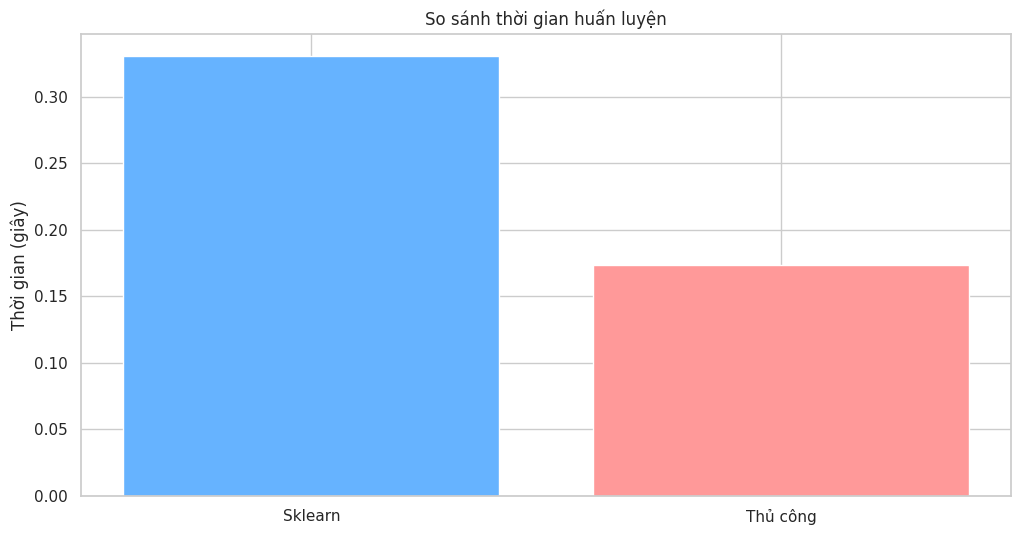

In [607]:
# Đo thời gian huấn luyện
# Sklearn
start_sklearn = time.time()
model_sklearn.fit(X_train_resampled, y_train_resampled)
end_sklearn = time.time()
sklearn_time = end_sklearn - start_sklearn  # Thời gian sklearn
print(f"Thời gian huấn luyện (sklearn): {sklearn_time:.2f} giây")

# Thủ công
start_manual = time.time()
theta = train_logistic_regression(X_train_np, y_train_np)
end_manual = time.time()
manual_time = end_manual - start_manual  # Thời gian thủ công
print(f"Thời gian huấn luyện (thủ công): {manual_time:.2f} giây")

# Trực quan hóa so sánh thời gian huấn luyện
times = [sklearn_time, manual_time]  # Thời gian đo được
labels = ["Sklearn", "Thủ công"]

plt.figure(figsize=(12, 6))
plt.bar(labels, times, color=["#66b3ff", "#ff9999"])
plt.ylabel("Thời gian (giây)")
plt.title("So sánh thời gian huấn luyện")
plt.show()


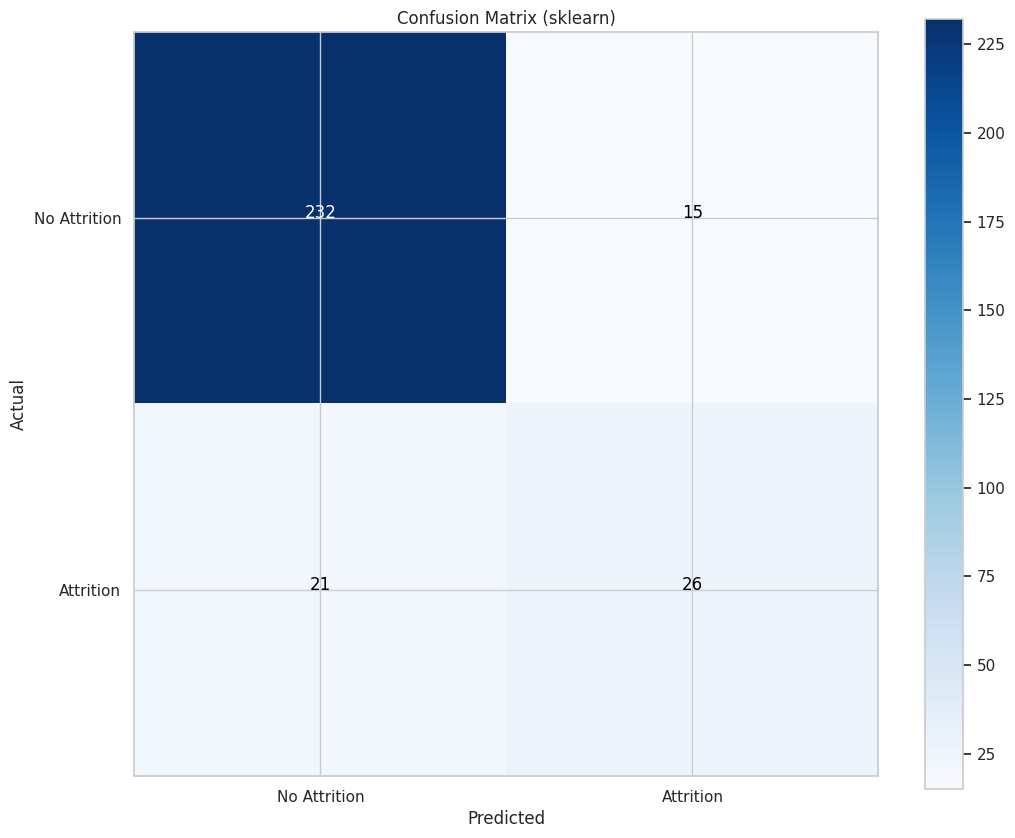

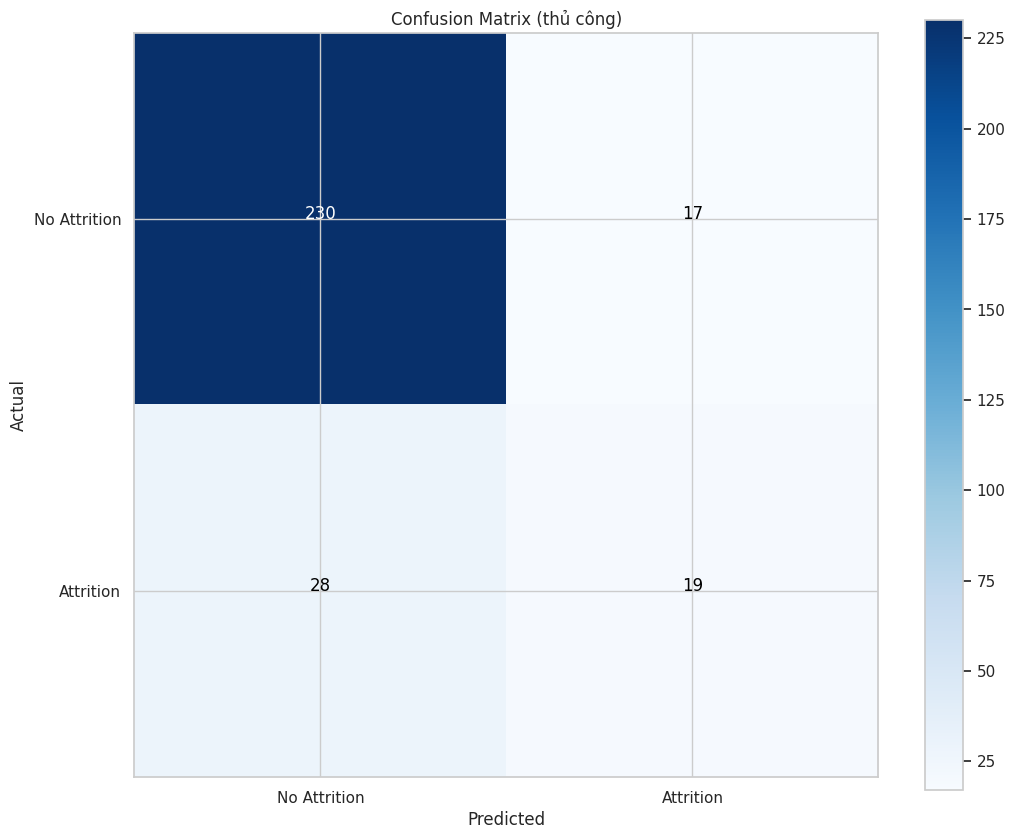

In [608]:
plot_confusion_matrix(y_test_np, y_pred_sklearn, title="Confusion Matrix (sklearn)")
plot_confusion_matrix(y_test_np, y_pred_manual, title="Confusion Matrix (thủ công)")


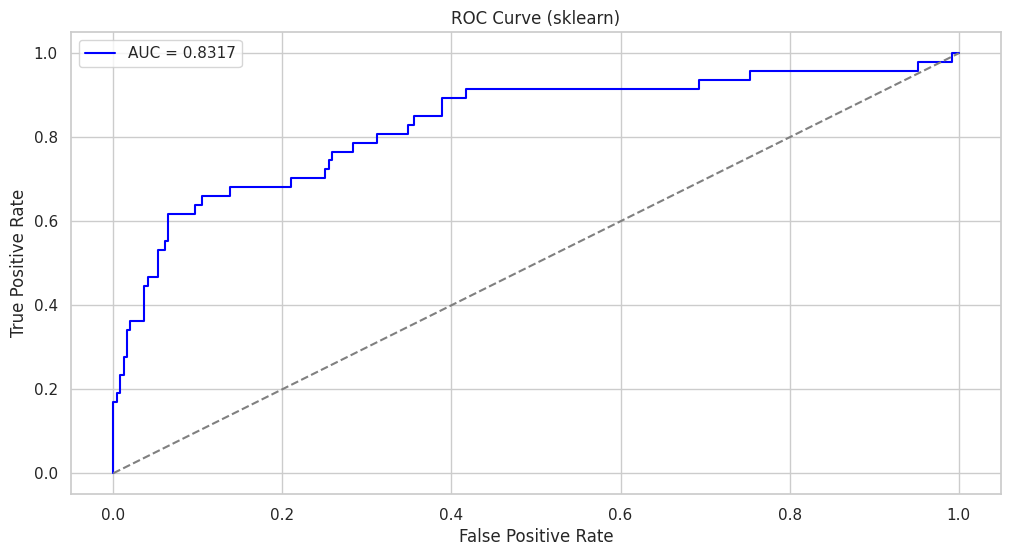

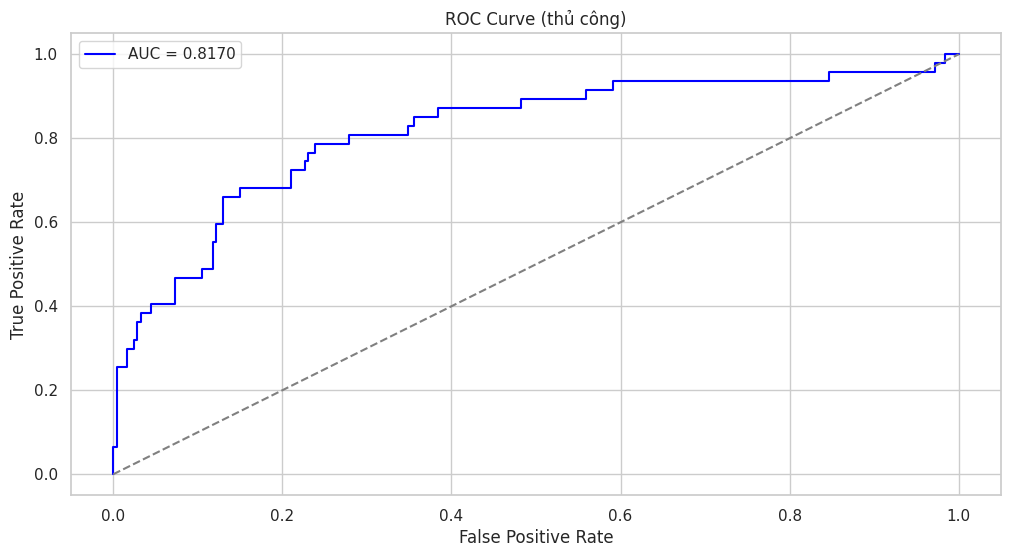

In [609]:
plot_roc_curve(y_test_np, y_pred_proba_sklearn, title="ROC Curve (sklearn)")
plot_roc_curve(y_test_np, y_pred_proba_manual, title="ROC Curve (thủ công)")

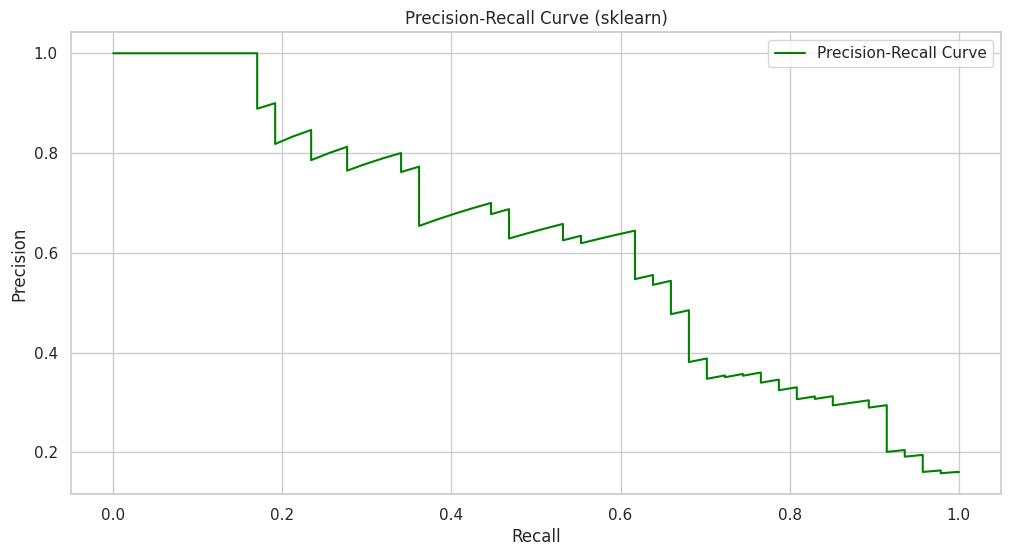

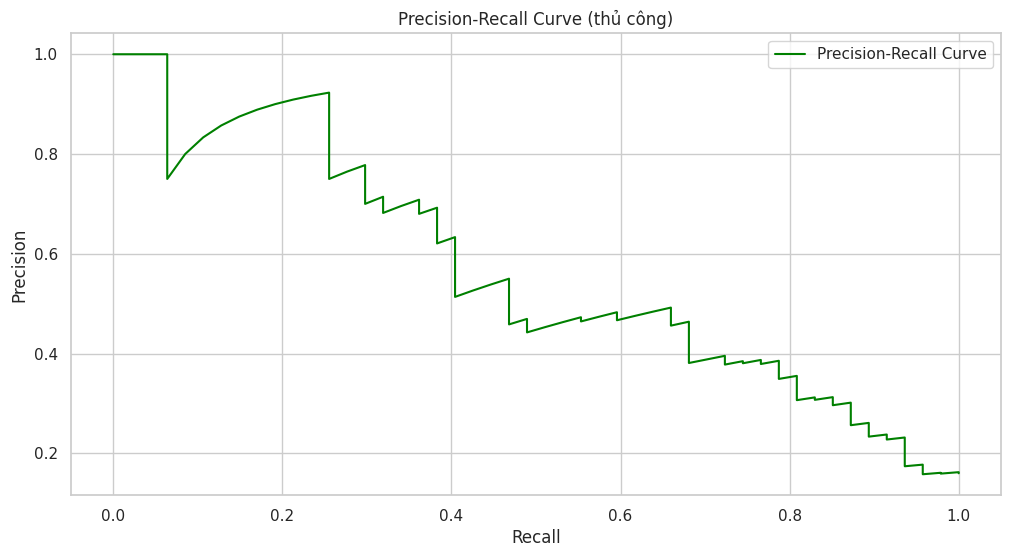

In [610]:
plot_precision_recall_curve(y_test_np, y_pred_proba_sklearn, title="Precision-Recall Curve (sklearn)")
plot_precision_recall_curve(y_test_np, y_pred_proba_manual, title="Precision-Recall Curve (thủ công)")


## ***Đánh giá và Kết luận***  


#### **1. Tổng quan về dự án**  
Dự án này tập trung vào xây dựng một mô hình **Logistic Regression** để dự đoán khả năng một nhân viên rời bỏ công ty (*Attrition*). Bằng cách khai thác dữ liệu nhân sự, mô hình giúp xác định các yếu tố quan trọng ảnh hưởng đến sự nghỉ việc, từ đó hỗ trợ doanh nghiệp trong việc quản lý nhân sự hiệu quả hơn.  



#### **2. Kết quả đạt được**  
Sau khi áp dụng các bước tiền xử lý dữ liệu, huấn luyện mô hình và đánh giá hiệu suất, mô hình **đạt được độ chính xác (Accuracy) 87.76%**. Các chỉ số đánh giá khác như:  
- **Precision**: 63.41%  
- **Recall**: 55.32%  
- **F1-Score**: 59.09%  

Những kết quả này cho thấy mô hình có khả năng phân loại khá tốt, đặc biệt là khi xem xét Precision cao, giúp giảm thiểu các dự đoán sai lệch về việc nhân viên rời đi.  



#### **3. Ý nghĩa thực tế**  
- **Dự báo xu hướng nghỉ việc**: Mô hình có thể hỗ trợ phòng nhân sự trong việc nhận diện sớm những nhân viên có khả năng rời bỏ công ty, giúp đưa ra các biện pháp giữ chân phù hợp.  
- **Tối ưu hóa chiến lược nhân sự**: Từ kết quả phân tích, doanh nghiệp có thể xác định các yếu tố quan trọng ảnh hưởng đến sự hài lòng của nhân viên và cải thiện chính sách nhân sự.  
- **Tăng hiệu quả ra quyết định**: Việc ứng dụng mô hình giúp doanh nghiệp đưa ra quyết định dựa trên dữ liệu thay vì cảm tính, từ đó nâng cao hiệu quả quản lý nhân sự.  



#### **4. Hạn chế và hướng phát triển**  
- **Hạn chế về dữ liệu**: Mô hình có thể bị ảnh hưởng bởi sự thiếu hụt dữ liệu hoặc chất lượng dữ liệu đầu vào. Việc mở rộng nguồn dữ liệu có thể giúp cải thiện độ chính xác.  
- **Các yếu tố chưa được xét đến**: Một số yếu tố khác như văn hóa công ty, cơ hội phát triển, môi trường làm việc có thể đóng vai trò quan trọng nhưng chưa được đưa vào mô hình.

### **Kết luận**  
Mô hình Logistic Regression đã cho thấy tính hiệu quả trong việc phân loại và dự đoán nhân viên có nguy cơ rời bỏ công ty. Mặc dù vẫn còn một số hạn chế, kết quả này mang lại những giá trị hữu ích trong việc hỗ trợ doanh nghiệp quản lý nhân sự. Trong tương lai, việc thử nghiệm các phương pháp khác và cải thiện dữ liệu có thể giúp nâng cao độ chính xác và tính ứng dụng của mô hình.